In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [89]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantDisease\\train",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 70295 files belonging to 38 classes.


In [4]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [5]:
len(dataset)

2197

In [6]:
for image_batch,label_batch in dataset.take(1):
    # print(image_batch[0])
    print(image_batch[0].numpy())
    print(image_batch.shape)
    # print(label_batch.numpy())

[[[161.   145.   155.  ]
  [158.   142.   152.  ]
  [155.   139.   149.  ]
  ...
  [158.5  142.5  152.5 ]
  [173.75 157.75 167.75]
  [163.5  147.5  157.5 ]]

 [[153.25 137.25 147.25]
  [157.5  141.5  151.5 ]
  [159.25 143.25 153.25]
  ...
  [173.75 157.75 167.75]
  [170.   154.   164.  ]
  [175.5  159.5  169.5 ]]

 [[157.5  141.5  151.5 ]
  [155.75 139.75 149.75]
  [157.5  141.5  151.5 ]
  ...
  [153.5  137.5  147.5 ]
  [167.25 151.25 161.25]
  [169.5  153.5  163.5 ]]

 ...

 [[162.75 143.75 149.75]
  [160.75 141.75 147.75]
  [155.5  136.5  142.5 ]
  ...
  [157.25 142.25 149.25]
  [164.25 149.25 156.25]
  [154.75 139.75 146.75]]

 [[153.25 134.25 140.25]
  [153.   134.   140.  ]
  [154.5  135.5  141.5 ]
  ...
  [162.5  147.5  154.5 ]
  [162.   147.   154.  ]
  [162.25 147.25 154.25]]

 [[151.5  132.5  138.5 ]
  [156.5  137.5  143.5 ]
  [153.5  134.5  140.5 ]
  ...
  [152.75 137.75 144.75]
  [149.5  134.5  141.5 ]
  [159.75 144.75 151.75]]]
(32, 128, 128, 3)


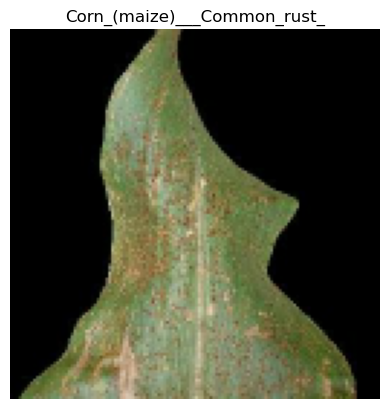

In [7]:
for image_batch,label_batch in dataset.take(1):
    # everytime it shuffles as it been enabled
    plt.imshow(image_batch[31].numpy().astype("uint8"))
    plt.title(class_names[label_batch[31]])
    plt.axis("off")
    # label_batch

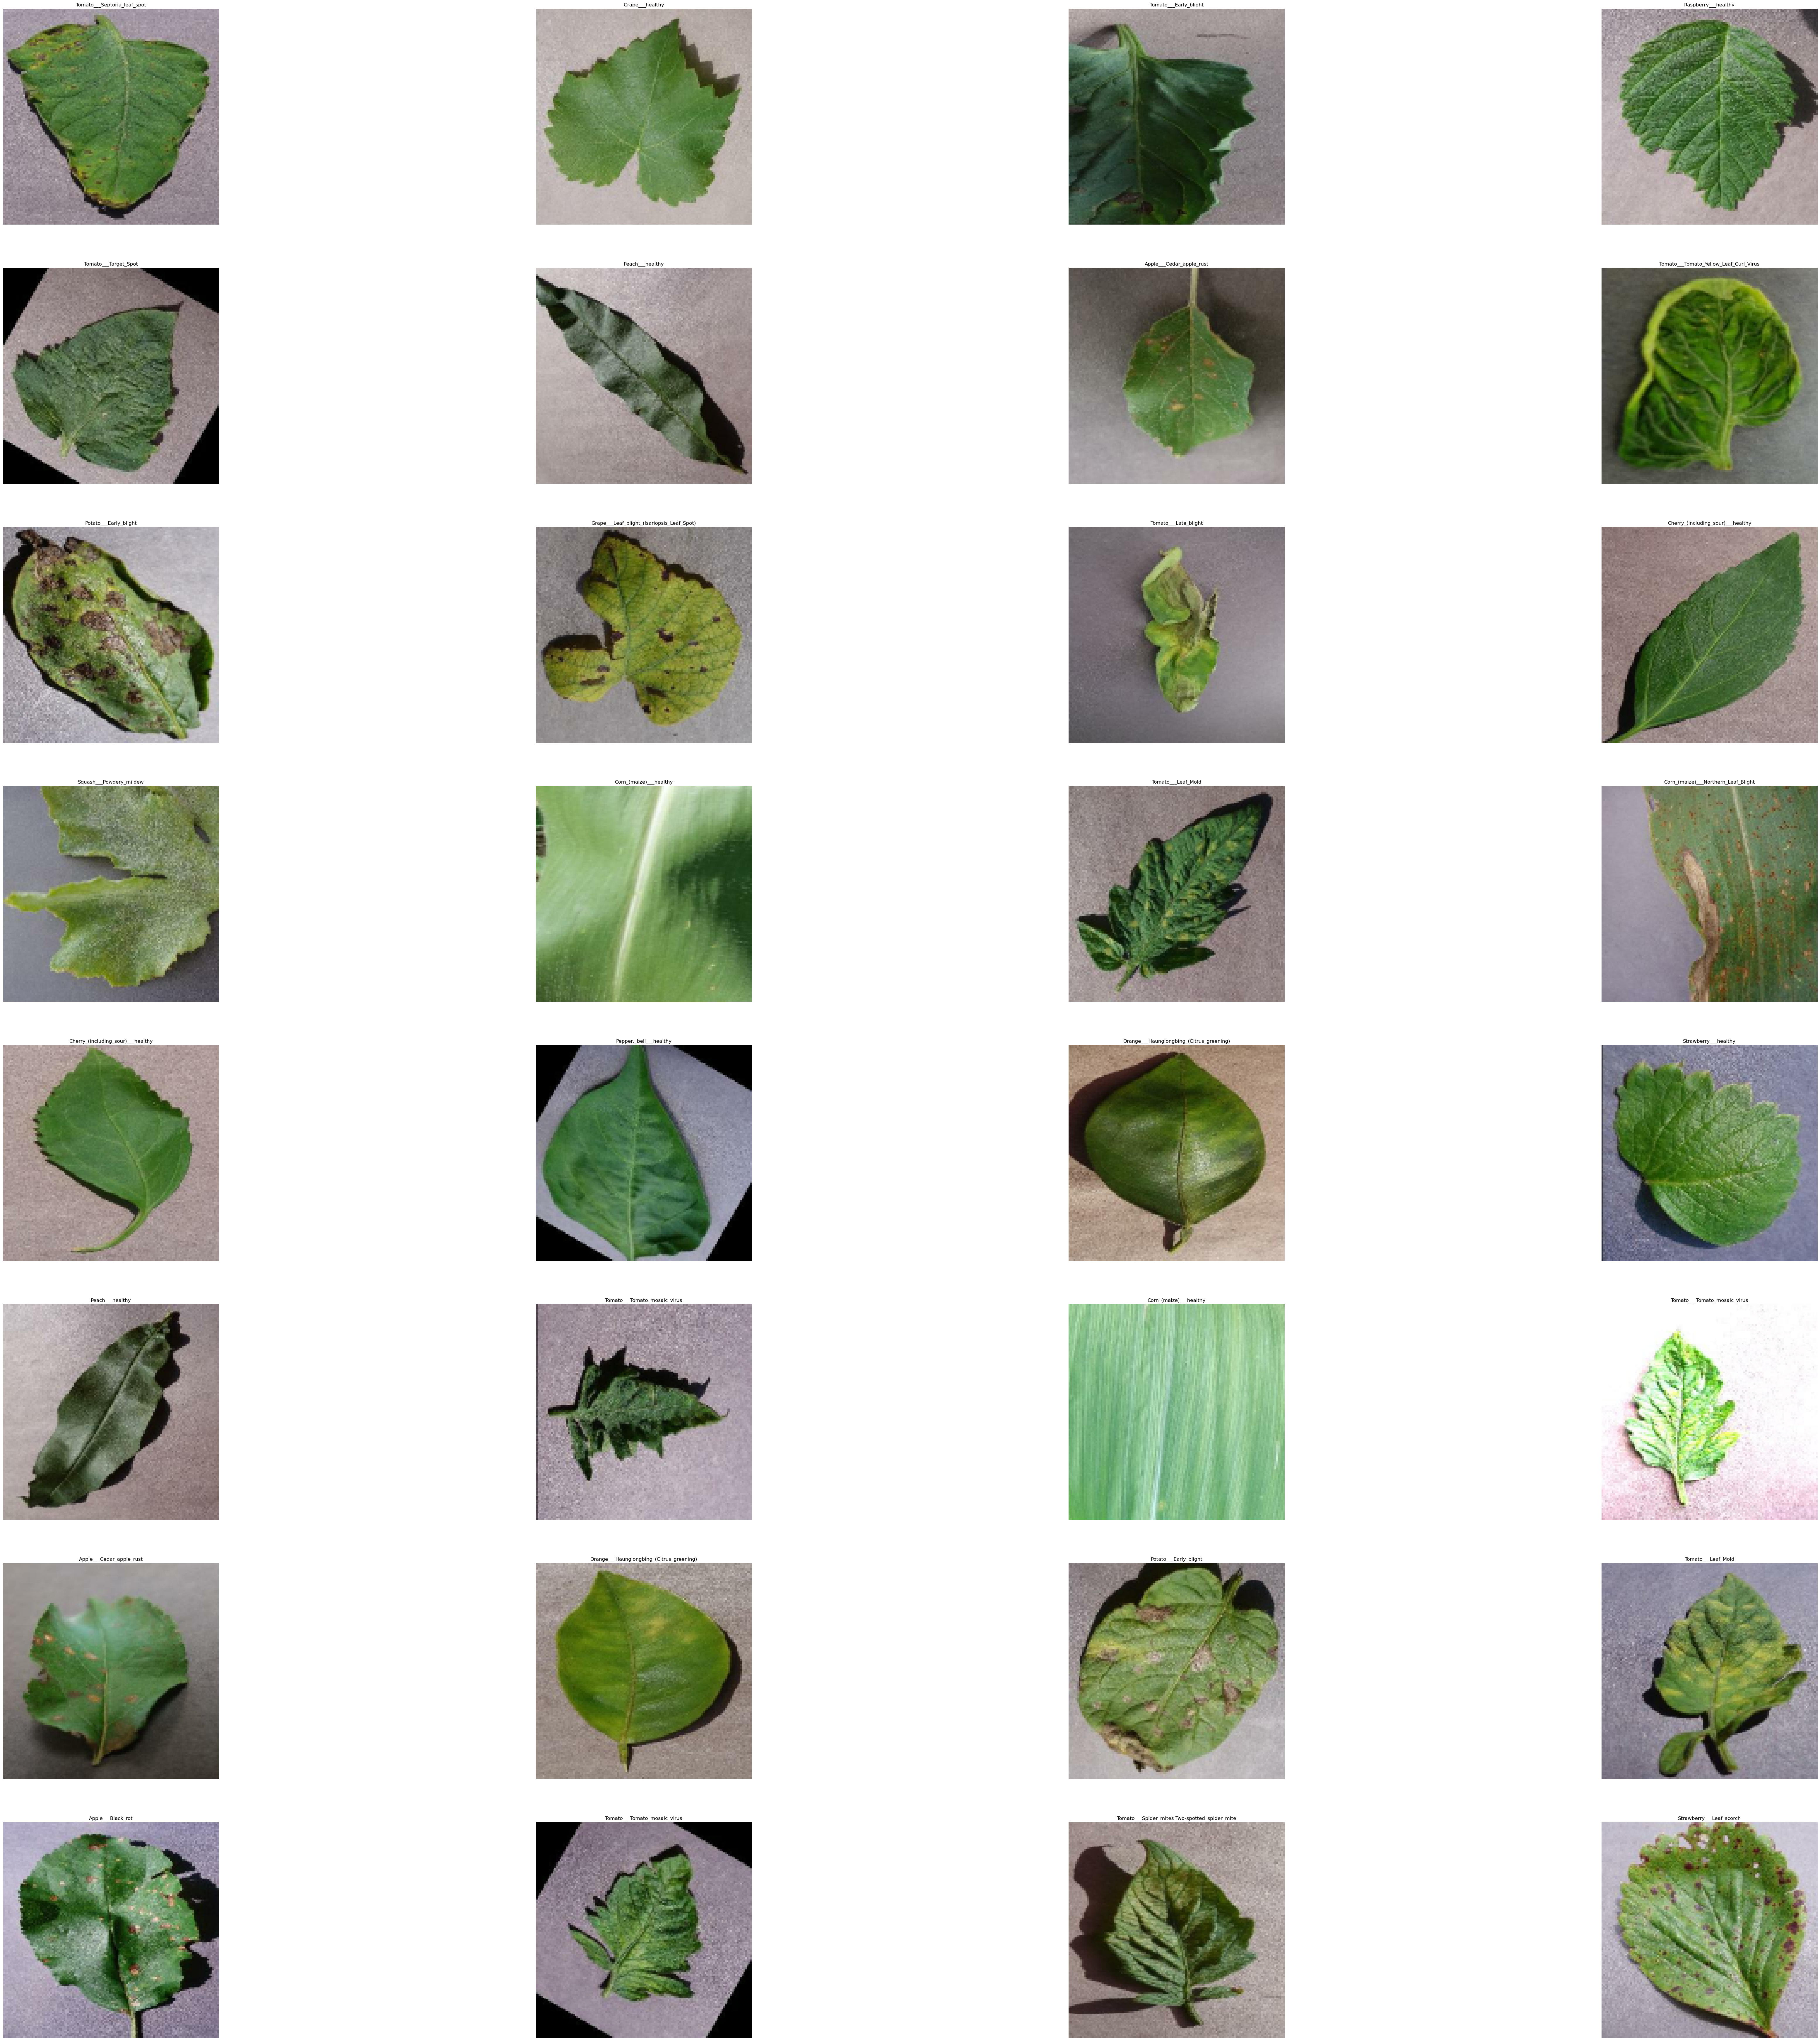

In [8]:
plt.figure(figsize=(90,90))
for image_batch,label_batch in dataset.take(1):
    for i in range (32):
        # plt.subplot(row,col,till?)
        ax = plt.subplot(8,4,i+1)        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # label_batch

In [9]:
len(dataset)


2197

In [10]:

train_size = 0.8
len(dataset)*train_size

1757.6000000000001

In [11]:
train_ds = dataset.take(1757)
len(train_ds)

1757

In [12]:
test_ds = dataset.skip(1757)
len(test_ds)

440

In [13]:
val_size=0.1
len(dataset)*val_size

219.70000000000002

In [14]:
val_ds = test_ds.take(219)
len(val_ds)

219

In [15]:
test_ds = test_ds.skip(219)
len(test_ds)

221

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=500):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=42)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:

len(train_ds)

1757

In [19]:

len(val_ds)

219

In [20]:

len(test_ds)

221

Cache, Shuffle, and Prefetch the Dataset

A common rule of thumb is to set the shuffle buffer size to a value that is a fraction of the total dataset size, ideally around 10-20% of the dataset size.

In [23]:
train_ds = train_ds.cache().shuffle(700).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(700).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(700).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),  # Accept any input size
    layers.Rescaling(1.0 / 255)  # Rescales pixel values from [0, 255] to [0, 1]
])

C:\Users\dhany\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

In [26]:
n_classes = 38

<div style="font-size: 12px">

### 1. `layers.Conv2D`

The `Conv2D` layer is used for applying convolution operations to 2D data, like images. Here’s a breakdown of its parameters:

- **Filters (or Number of Output Channels)**:
  - `32`: This specifies the number of filters (also known as kernels) to be applied to the input image. Each filter detects different features in the image (like edges, textures, etc.). A larger number of filters can help the model learn more complex features but increases computational cost.

- **Kernel Size**:
  - `kernel_size=(3, 3)`: This defines the dimensions of the filter. A `(3, 3)` kernel means that each filter has a width and height of 3 pixels. Smaller kernels help capture fine details, while larger kernels can capture more contextual information. Common kernel sizes are `(3, 3)` and `(5, 5)`.

- **Activation Function**:
  - `activation='relu'`: This specifies the activation function to be applied after the convolution operation. `ReLU` (Rectified Linear Unit) is a popular choice because it introduces non-linearity into the model, allowing it to learn complex patterns. It replaces all negative pixel values with zero, which helps in speeding up the training process and preventing the vanishing gradient problem.

- **Input Shape** (Not Needed Here):
  - You mentioned that there's no need for `input_shape` in this layer. This is correct for subsequent layers after the first `Conv2D` layer, as the input shape is only required for the first layer of the model. The shape of the input should be in the format `(height, width, channels)` (for example, `(224, 224, 3)` for a color image).

### 2. `layers.MaxPooling2D`

The `MaxPooling2D` layer is used to down-sample the feature maps produced by the convolutional layers. Here's how it works:

- **Pool Size**:
  - `pool_size=(2, 2)`: This defines the size of the pooling window. A pool size of `(2, 2)` means that the layer will take the maximum value from each `2x2` block of the feature map. This helps reduce the spatial dimensions (height and width) of the feature maps, effectively reducing the number of parameters and computations in the network while retaining the most important information.

- **Stride** (Default Value):
  - The `strides` parameter determines how far the pooling window moves across the feature map. If not specified, it defaults to the same value as `pool_size`, which in this case would be `2`. This means the pooling operation will skip every second block, reducing the size of the output feature map significantly.

### Summary

- **`Conv2D`**: Extracts features from the input images using multiple filters and a specified kernel size, applying a non-linear activation function afterward.
- **`MaxPooling2D`**: Down-samples the feature maps to reduce dimensions and computational cost while retaining significant features by selecting the maximum value from each defined pool size.

Together, these layers help the model learn spatial hierarchies of features from images effectively, contributing to improved performance in image classification tasks.
 

### 1. `layers.Flatten`

The `Flatten` layer is used to convert the multi-dimensional output from the previous layer (typically a 2D feature map produced by convolutional layers) into a one-dimensional array (or vector). Here’s how it works:

- **Purpose**:
  - After applying convolutional and pooling layers, the output is usually a 3D tensor (height, width, channels). The `Flatten` layer transforms this tensor into a 1D tensor, making it suitable for input into the fully connected (Dense) layers that follow. 
  - For example, if the output of the last pooling layer is of shape `(batch_size, height, width, channels)`, the `Flatten` layer converts this to `(batch_size, height * width * channels)`.

- **Why Use It**:
  - The flattened output serves as a bridge between the convolutional layers (which focus on feature extraction) and the Dense layers (which focus on classification or regression). It prepares the data for the fully connected layers by turning it into a shape that these layers can process.

### 2. `layers.Dense`

The `Dense` layer is a fully connected layer, meaning every neuron in this layer is connected to every neuron in the previous layer. It is primarily used for making predictions or classifications based on the features extracted by the convolutional layers. Here’s a breakdown:

- **Units (or Neurons)**:
  - `64`: This specifies the number of neurons in the Dense layer. Each neuron learns to recognize a different combination of features extracted from the previous layers. The more neurons you have, the more complex patterns the layer can learn, but it also increases the risk of overfitting and the computational cost.

- **Activation Function**:
  - `activation='relu'`: Similar to the convolutional layers, using `ReLU` as the activation function helps introduce non-linearity into the model. This allows the model to learn more complex representations of the data. Other common activation functions for Dense layers include `sigmoid` (for binary classification) and `softmax` (for multi-class classification).


</div>


In [28]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,  # Include data augmentation in the model
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,094 (582.40 KB)

 Trainable params: 149,094 (582.40 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [31]:
modelhistory = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 479s 254ms/step - accuracy: 0.1954 - loss: 2.8786 - val_accuracy: 0.5238 - val_loss: 1.5519
Epoch 2/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 420s 238ms/step - accuracy: 0.6200 - loss: 1.2050 - val_accuracy: 0.7179 - val_loss: 0.8705
Epoch 3/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 391s 223ms/step - accuracy: 0.7626 - loss: 0.7405 - val_accuracy: 0.7666 - val_loss: 0.7191
Epoch 4/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 386s 220ms/step - accuracy: 0.8155 - loss: 0.5702 - val_accuracy: 0.8495 - val_loss: 0.4561
Epoch 5/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 377s 214ms/step - accuracy: 0.8490 - loss: 0.4684 - val_accuracy: 0.8286 - val_loss: 0.5553
Epoch 6/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 408s 232ms/step - accuracy: 0.8705 - loss: 0.3988 - val_accuracy: 0.8776 - val_loss: 0.3653
Epoch 7/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 412s 234ms/step - accuracy: 0.8854 - loss: 0.3442 - val_accuracy: 0.8446 - val_loss: 0.4911
Epoch 8/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 407s 232ms/step - ac

In [61]:
scores = model.evaluate(test_ds)

221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9076 - loss: 0.2882


In [63]:
scores = model.evaluate(train_ds)

1757/1757 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.9105 - loss: 0.2695


In [ ]:
scores = model.evaluvate(val_ds)

In [65]:
scores

[0.27291226387023926, 0.909967303276062]

In [79]:
# Access the training history
print(modelhistory.history)



{'accuracy': [0.34508395195007324, 0.6675085425376892, 0.7807164192199707, 0.8262307643890381, 0.8559867739677429, 0.8755513429641724, 0.8883395195007324, 0.8990466594696045, 0.9071748852729797, 0.9109810590744019], 'loss': [2.243616819381714, 1.0493512153625488, 0.6848300099372864, 0.5363590717315674, 0.44254738092422485, 0.380958616733551, 0.3356480002403259, 0.30500924587249756, 0.28058159351348877, 0.26813164353370667], 'val_accuracy': [0.5238299369812012, 0.7178938388824463, 0.7665525078773499, 0.8494577407836914, 0.828624427318573, 0.8775684833526611, 0.8446061611175537, 0.8904109597206116, 0.8798515796661377, 0.9081050157546997], 'val_loss': [1.5519099235534668, 0.8704652190208435, 0.7191164493560791, 0.4561308026313782, 0.5553373098373413, 0.36534279584884644, 0.4911061227321625, 0.3398011028766632, 0.36563485860824585, 0.28249114751815796]}


In [83]:
print(modelhistory.params)

{'verbose': 1, 'epochs': 10, 'steps': 1757}


In [85]:
acc = modelhistory.history['accuracy']
val_acc = modelhistory.history['val_accuracy']

loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']


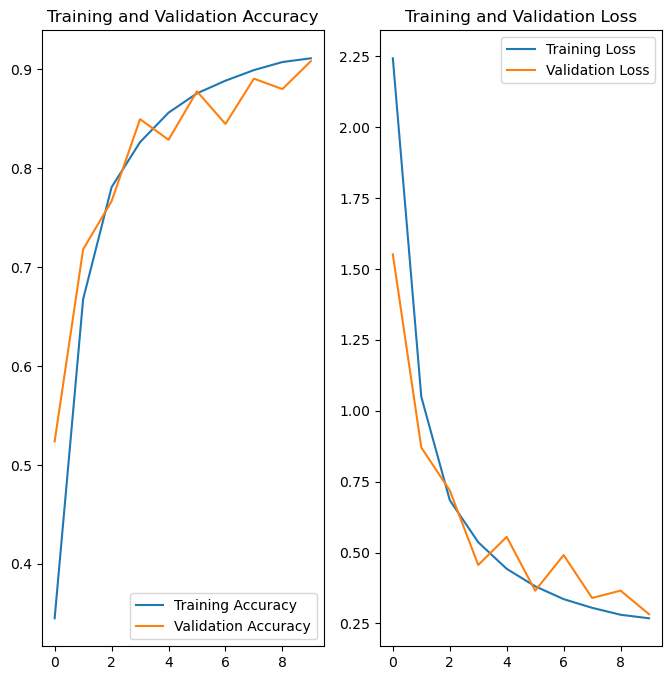

In [91]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Raspberry___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
predicted label: Raspberry___healthy


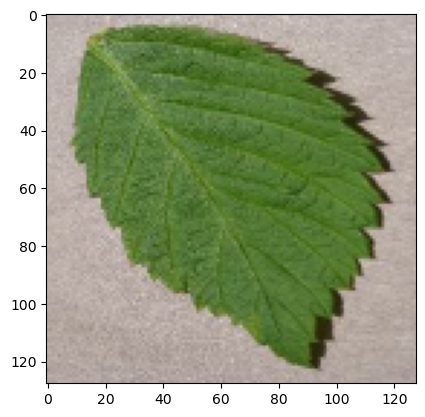

In [106]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [108]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


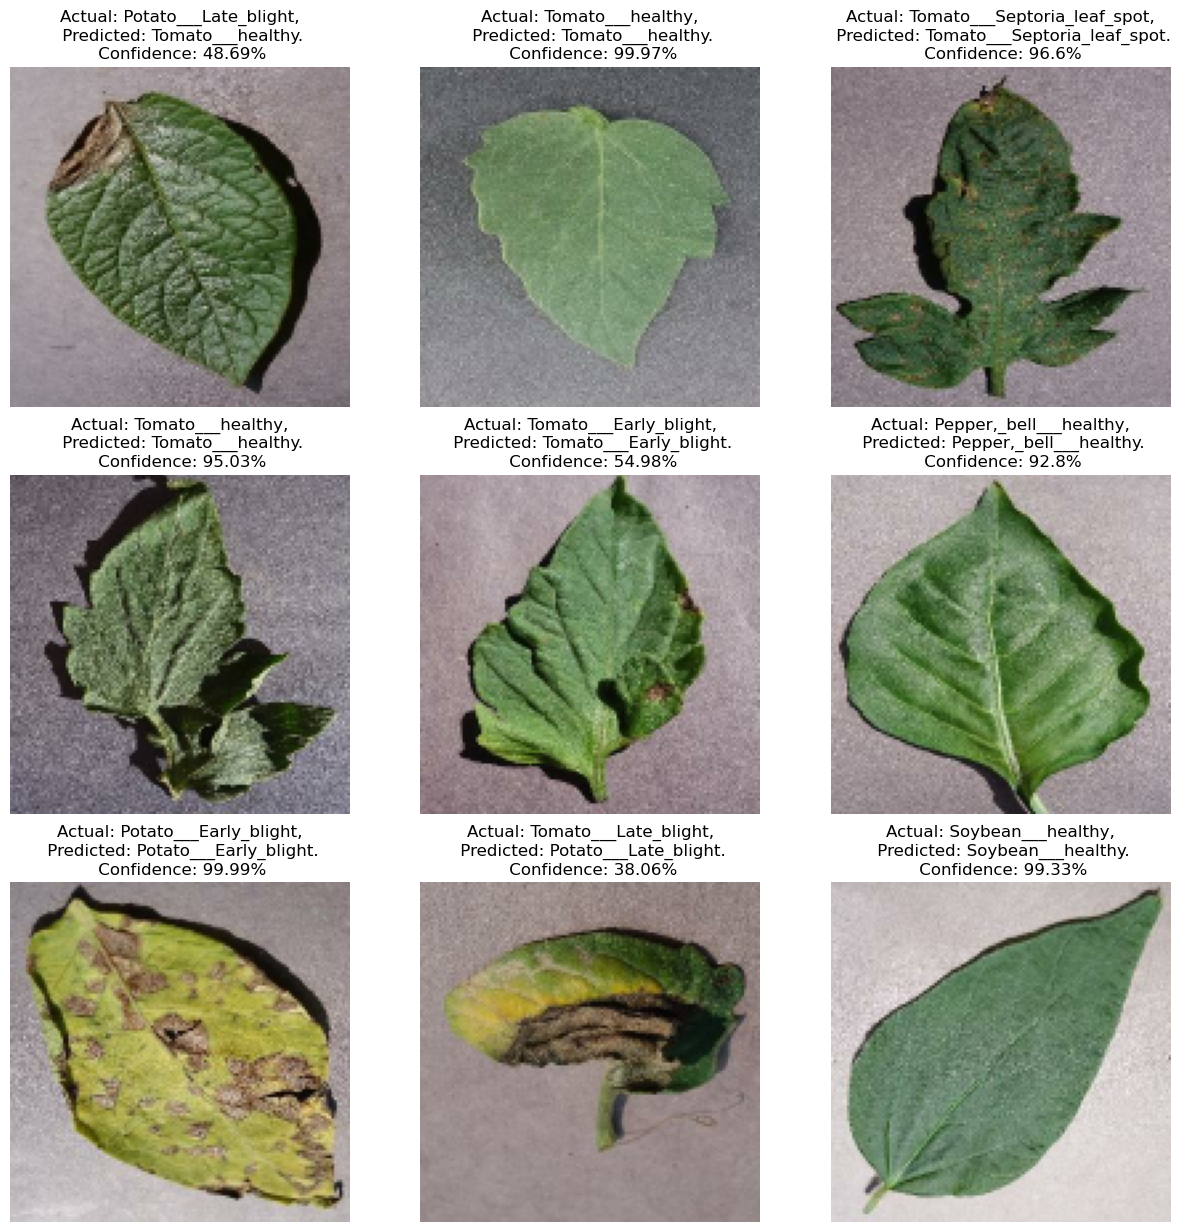

In [110]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [184]:
import os

# List all entries in the "models" directory
all_entries = os.listdir("models")

# Filter the entries to include only those that are numeric
numeric_entries = [entry for entry in all_entries if entry.isdigit()]

print(numeric_entries)


['1']


In [174]:
import os

# Filter the directory listing to only include numeric entries
model_versions = [i for i in os.listdir("models") if i.isdigit()]

# Convert the filtered versions to integers and find the maximum
model_version = max([int(i) for i in model_versions], default=0) + 1

# Create a new directory for the next model version
version_dir = f"models/{model_version}"
os.makedirs(version_dir, exist_ok=True)

# Save the model in the new version directory
model.save(f"{version_dir}/model.keras")


In [158]:
model.save("plantdisease.keras")

TypeError: 'module' object is not callable